### A time series classfication approach is a supervised machine learning approach to analyze multiple labeled classes of time series data and then predict or classify the class that a new data belongs to. Apart from human activity recognition it can play important role in other areas such as financial data or health based applications

In [1]:

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [ ]:
#main directory
dir_path = '/content/drive/My Drive/projects/MHEALTHDATASET'


## The aim of this project is to find the answer to the following key questions: 


1.   How classical machine learning algorithms perform on the time series classification task?
2.   Can deep learning enhanace the accuracy of classification task?
3.   Lastly can we train a model that achieves 90% or greater accuracy on human activity recognition task?

![picture](https://www.hrupin.com/wp-content/uploads/2016/05/activityrecognition.jpg)


In [2]:
# importing modules
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go

In [3]:
#Combine all 10 subjects in a single dataframe
agg_df = pd.DataFrame()

In [4]:
#Code to aggregate the dataset
for i in range (1,11):
  temp_df = pd.read_csv(f'/content/drive/My Drive/projects/MHEALTHDATASET/mHealth_subject{i}.log',
                        header =None, sep='\t')
  temp_df = temp_df.loc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]].rename(columns={
      0: 'acc_ch_x', 
      1: 'acc_ch_y', 
      2: 'acc_ch_z', 
      5: 'acc_la_x', 
      6: 'acc_la_y', 
      7: 'acc_la_z', 
      8: 'gyr_la_x',
      9: 'gyr_la_y', 
      10: 'gyr_la_z', 
      11: 'mag_la_x', 
      12: 'mag_la_y', 
      13: 'mag_la_z', 
      14: 'acc_rw_x', 
      15: 'acc_rw_y',
      16: 'acc_rw_z', 
      17: 'gyr_rw_x', 
      18: 'gyr_rw_y', 
      19: 'gyr_rw_z', 
      20: 'mag_rw_x', 
      21: 'mag_rw_y', 
      22: 'mag_rw_z',
      23: 'activity'
  })

  temp_df['subject'] =f'subject{i}'
  agg_df = pd.concat([agg_df,temp_df])

In [5]:
#checking the aggregated dataframe to ensure data has been concatenated
agg_df.head()

,acc_ch_x,acc_ch_y,acc_ch_z,3,4,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0,subject1


Next we once again check the data by looking at the type and drawing in relevant statistics associated with each predictor sensor variable

In [6]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215745 entries, 0 to 98303
Data columns (total 25 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   acc_ch_x  1215745 non-null  float64
 1   acc_ch_y  1215745 non-null  float64
 2   acc_ch_z  1215745 non-null  float64
 3   3         1215745 non-null  float64
 4   4         1215745 non-null  float64
 5   acc_la_x  1215745 non-null  float64
 6   acc_la_y  1215745 non-null  float64
 7   acc_la_z  1215745 non-null  float64
 8   gyr_la_x  1215745 non-null  float64
 9   gyr_la_y  1215745 non-null  float64
 10  gyr_la_z  1215745 non-null  float64
 11  mag_la_x  1215745 non-null  float64
 12  mag_la_y  1215745 non-null  float64
 13  mag_la_z  1215745 non-null  float64
 14  acc_rw_x  1215745 non-null  float64
 15  acc_rw_y  1215745 non-null  float64
 16  acc_rw_z  1215745 non-null  float64
 17  gyr_rw_x  1215745 non-null  float64
 18  gyr_rw_y  1215745 non-null  float64
 19  gyr_rw_z  1215745 non-n

In [7]:
agg_df.describe()

,acc_ch_x,acc_ch_y,acc_ch_z,3,4,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,...,acc_rw_x,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,...,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,-8.522361e+00,-2.140013e-01,-1.055950e+00,-5.122403e-03,-4.506434e-03,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,...,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.702138e-01,7.144626e-01,-3.668126e-01,1.741465e+00
std,4.075293e+00,2.138954e+00,3.574163e+00,7.465971e-01,7.270395e-01,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,...,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,2.667617e+01,3.344453e+01,6.955069e+01,3.283679e+00
min,-2.243800e+01,-2.018800e+01,-1.840100e+01,-8.619600e+00,-8.619600e+00,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,...,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,-3.190300e+02,-3.639000e+02,-7.175500e+02,0.000000e+00
25%,-9.804000e+00,-1.272900e+00,-2.867300e+00,-2.344300e-01,-1.883800e-01,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,...,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,-6.191900e+00,-9.519500e+00,-1.423800e+01,0.000000e+00
50%,-9.311400e+00,-3.538100e-01,-8.702000e-01,-7.116700e-02,-4.186300e-02,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,...,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,3.626200e-01,3.521700e-01,-6.729600e-01,0.000000e+00
75%,-7.637100e+00,7.097800e-01,7.259100e-01,1.590800e-01,1.507100e-01,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,...,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,6.792300e+00,1.007600e+01,1.318600e+01,2.000000e+00
max,1.909400e+01,2.092700e+01,2.619600e+01,8.514900e+00,8.519100e+00,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,...,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,2.511500e+02,3.377600e+02,6.571800e+02,1.200000e+01


In [ ]:
#now that I have aggregated the data I will save it as csv

agg_df.to_csv('/content/drive/My Drive/projects/MHEALTHDATASET/aggregate_mhealth.csv', index=False)

In [8]:
# We observe as in the EDA assignment the distribution of activity classes
# The '0' class is very imbalanced and thus we need to perform a resampling technique
# to balance the dataset
agg_df['activity'].value_counts()

0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: activity, dtype: int64

Resample data to mitigate class imblance

In [9]:
#function to resample to draw the same count of observations from all classes
def resample_df(data, num_observations):
    resampled_df = pd.DataFrame()
    for i in range(0, 13):
        data_activity_i = data[data['activity'] == i]
        data_activity_i = data_activity_i.sample(n=num_observations, random_state=1)
        resampled_df = pd.concat([data_activity_i, resampled_df])
    return resampled_df

In [10]:
resampled_df = resample_df(agg_df, 4000)
resampled_df.head()

,acc_ch_x,acc_ch_y,acc_ch_z,3,4,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
102036,-21.78300,-3.794900,-7.9521,0.30979,-0.03349,3.9643,-19.2610,-0.38175,0.20779,-0.96248,...,-18.57200,4.81100,-0.38039,-0.624230,0.84914,5.4721,62.4750,46.0550,12,subject7
66157,-2.15530,0.190500,1.0171,0.92098,0.47305,3.1057,-4.7165,-3.32980,0.39147,-0.63977,...,0.21375,-2.62470,-0.88824,-0.149900,0.61422,39.9060,22.9280,-62.9690,12,subject6
113869,7.01840,0.087807,-5.8026,-0.16745,1.00050,3.8237,3.6411,-18.07100,-0.27644,-0.70169,...,-1.60260,-0.25721,-1.00200,-0.316220,0.31250,-27.5170,67.0070,-5.5525,12,subject2
113762,0.81034,-0.618230,-2.0135,-2.48670,-2.28990,-21.3150,-19.1280,22.81000,0.73284,-0.60225,...,1.40960,1.95590,-0.61373,0.377820,0.84698,-13.3470,-6.1104,-25.4770,12,subject1
114452,-21.75600,-5.118700,-11.9030,1.59920,0.23443,-5.8230,-19.3550,-6.75510,-0.49907,-0.84428,...,-18.58100,12.87300,-1.03140,0.067762,0.32112,64.4480,-54.2540,228.9100,12,subject4


In [11]:
# The new resampled dataframe has an equal distribution of each activity class
resampled_df['activity'].value_counts()

12    4000
11    4000
10    4000
9     4000
8     4000
7     4000
6     4000
5     4000
4     4000
3     4000
2     4000
1     4000
0     4000
Name: activity, dtype: int64

In [12]:
activity_map = {
    1: 'Standing still (1 min)',  
    2: 'Sitting and relaxing (1 min)', 
    3: 'Lying down (1 min)',  
    4: 'Walking (1 min)',  
    5: 'Climbing stairs (1 min)',  
    6: 'Waist bends forward (20x)',
    7: 'Frontal elevation of arms (20x)', 
    8: 'Knees bending (crouching) (20x)', 
    9: 'Cycling (1 min)', 
    10: 'Jogging (1 min)', 
    11: 'Running (1 min)', 
    12: 'Jump front & back (20x)' 
}

Ensuring distribution similarity between resampled and original dataset for the first 3 classes as example

=================================== Standing still (1 min) - acc ===================================


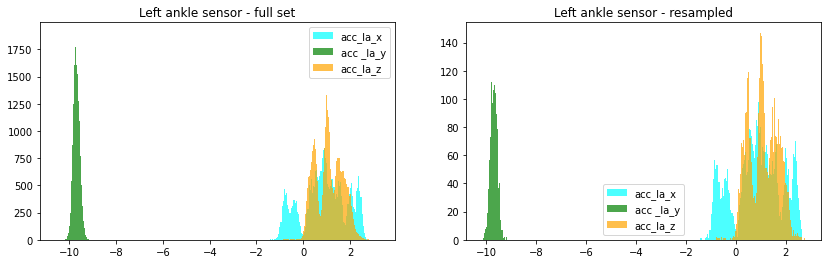

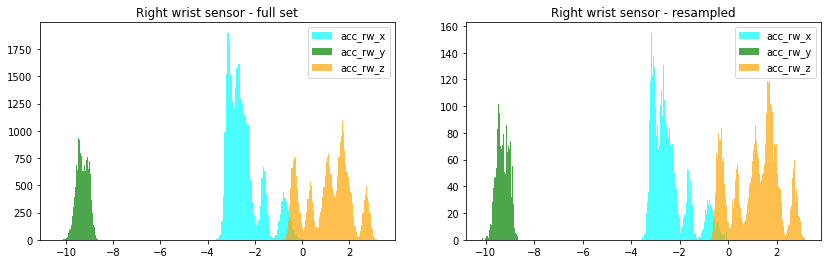

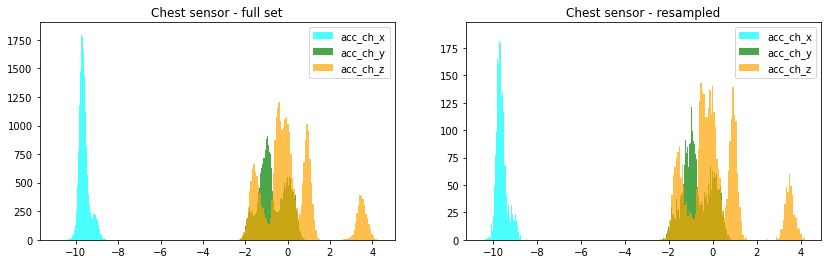

=================================== Standing still (1 min) - gyr ===================================


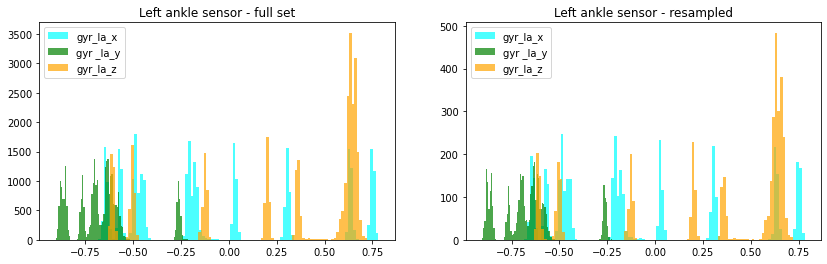

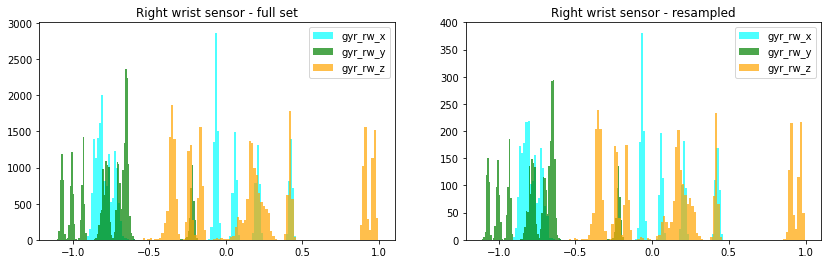

=================================== Standing still (1 min) - mag ===================================


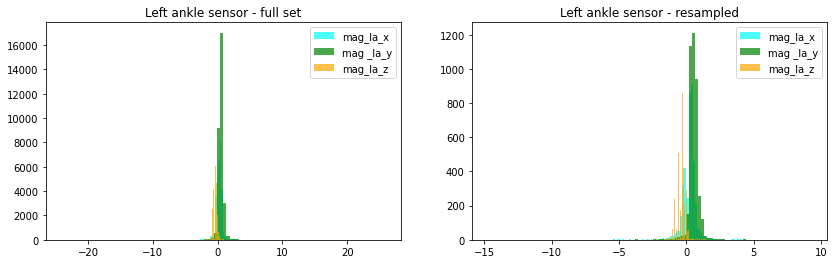

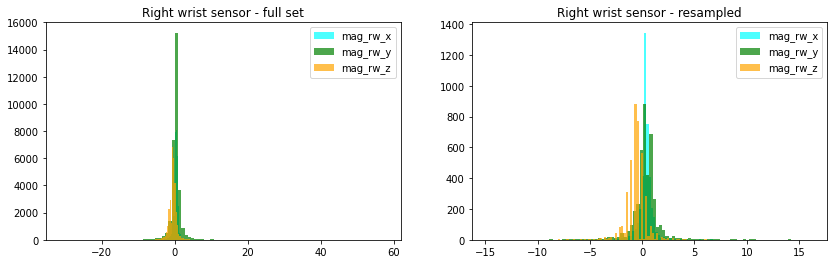

=================================== Sitting and relaxing (1 min) - acc ===================================


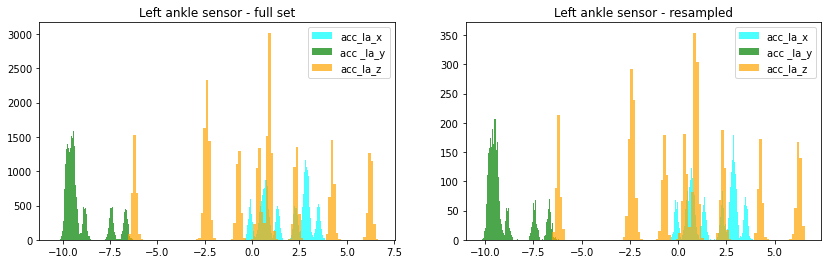

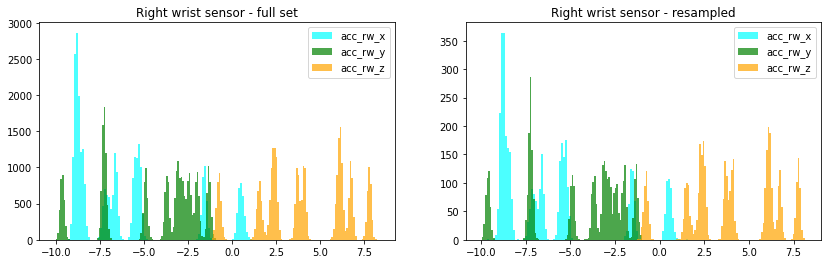

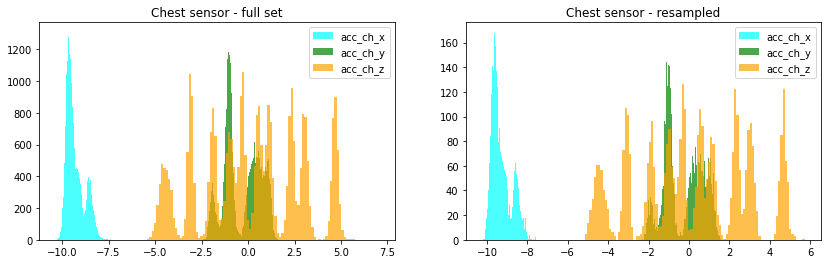

=================================== Sitting and relaxing (1 min) - gyr ===================================


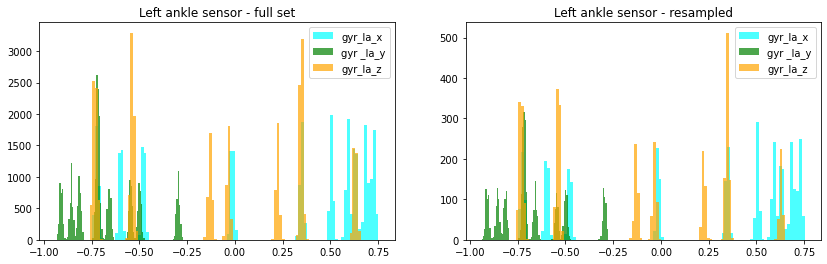

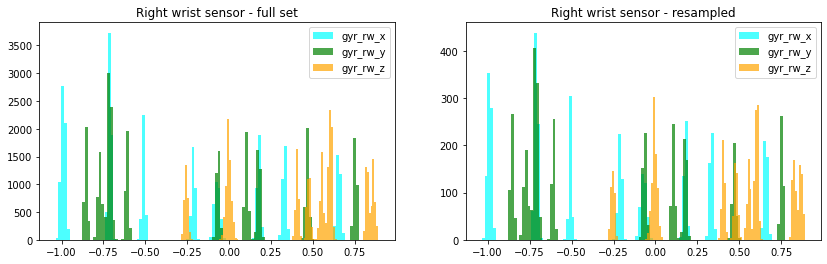

=================================== Sitting and relaxing (1 min) - mag ===================================


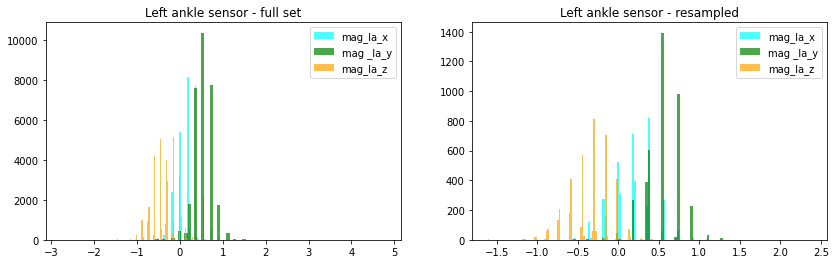

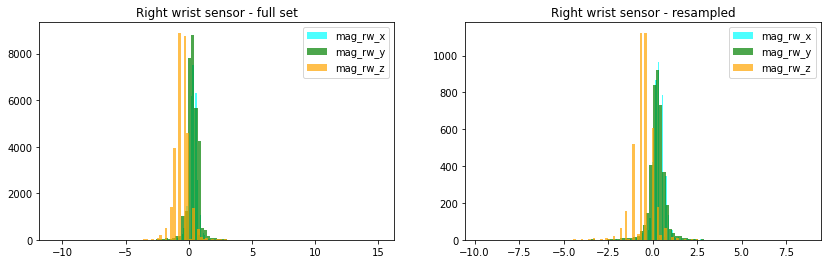

=================================== Lying down (1 min) - acc ===================================


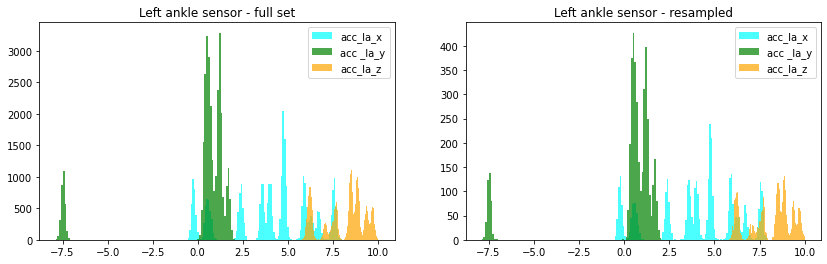

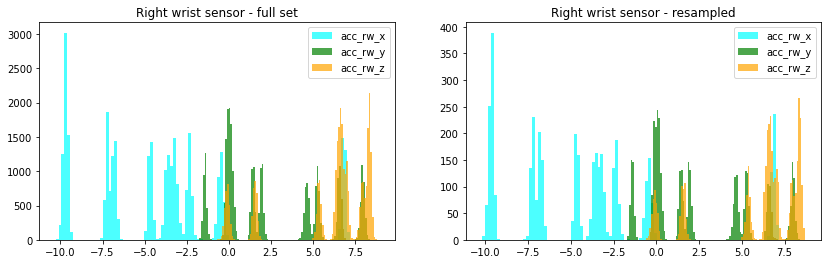

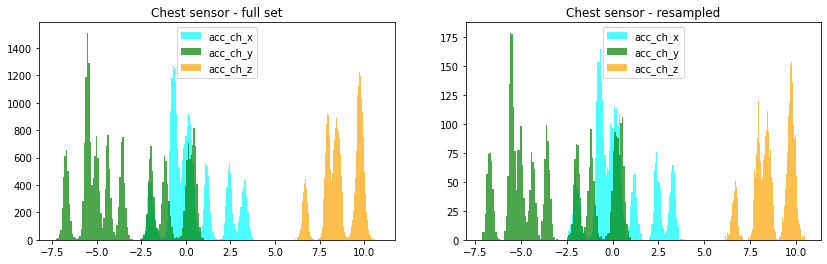

=================================== Lying down (1 min) - gyr ===================================


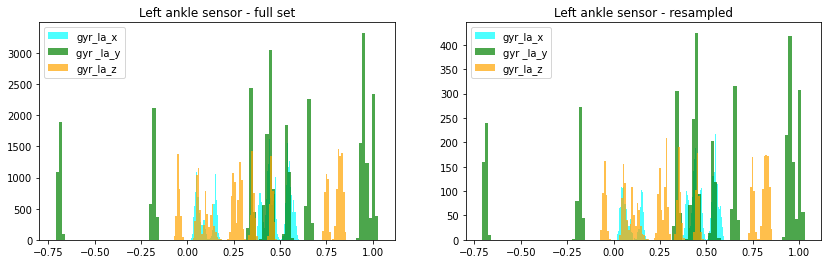

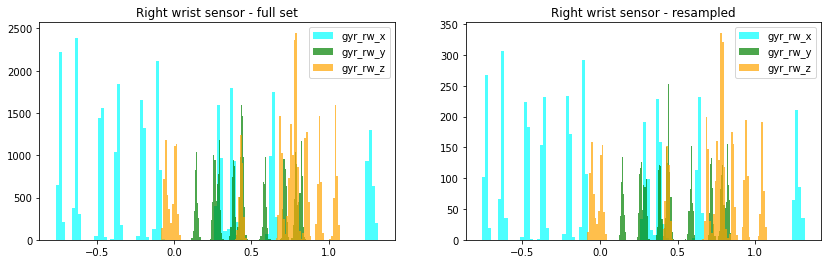

=================================== Lying down (1 min) - mag ===================================


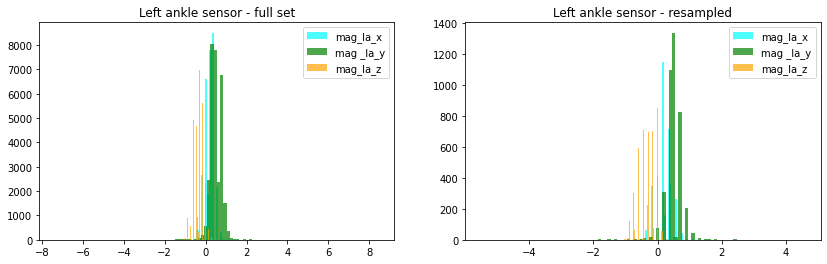

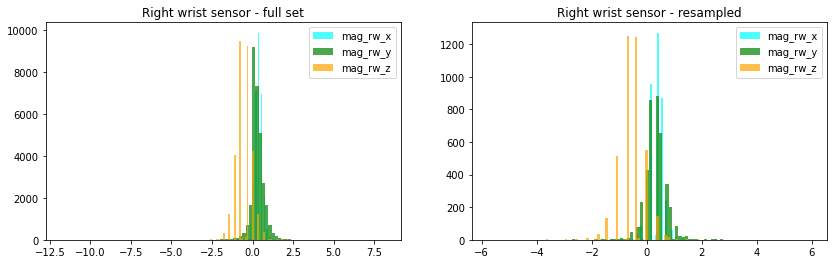

=================================== Walking (1 min) - acc ===================================


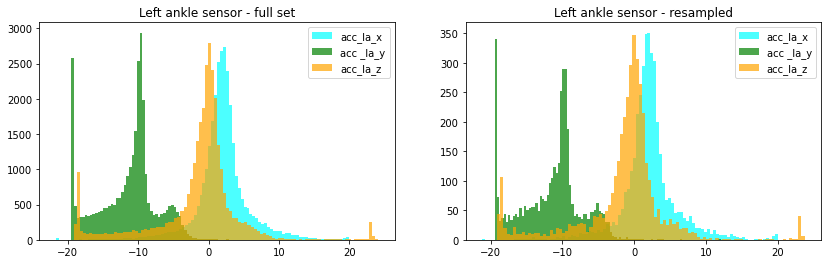

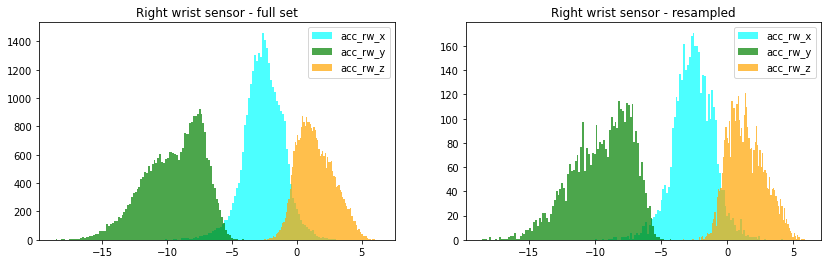

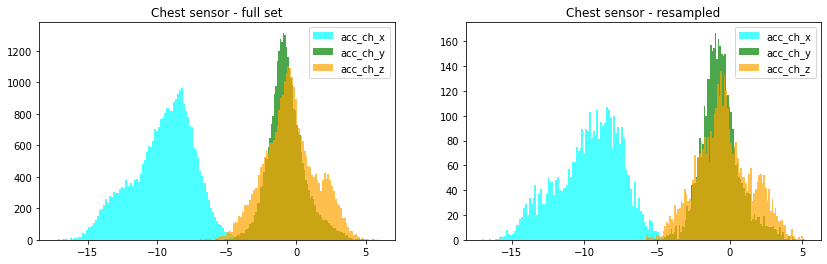

=================================== Walking (1 min) - gyr ===================================


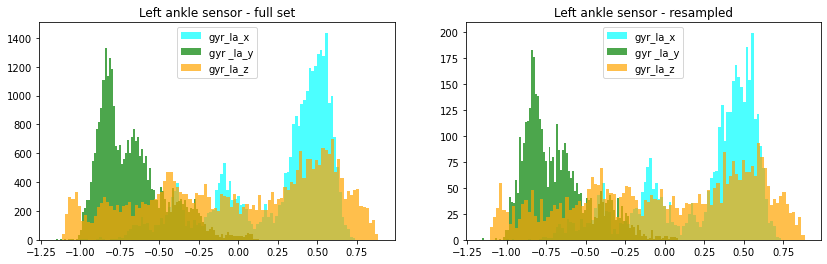

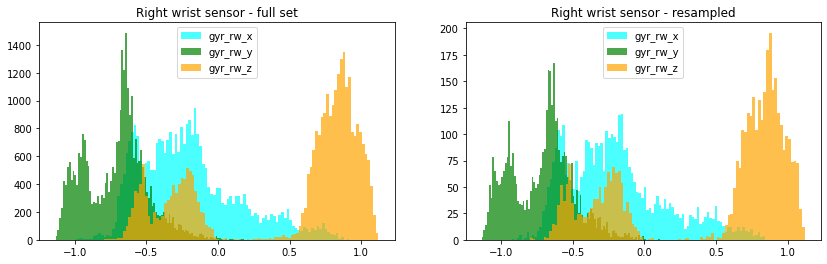

=================================== Walking (1 min) - mag ===================================


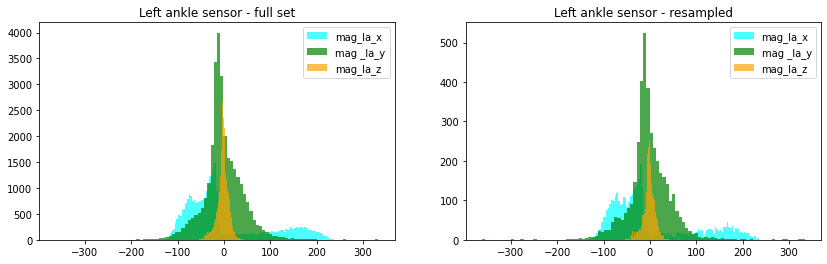

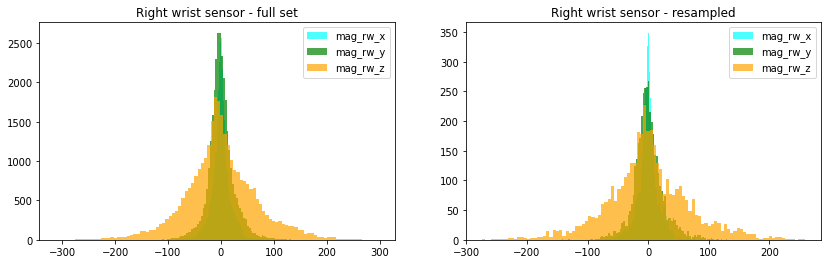

In [ ]:
readings = ['acc', 'gyr', 'mag']

for i in range(1, 3):
    for r in readings:

        print(f'=================================== {activity_map[i]} - {r} ===================================')
        
        # Full set
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(agg_df[agg_df['activity']==i].reset_index(drop=True)[r + '_la_x'], color='cyan', alpha=.7, label= r + '_la_x', bins=100)
        plt.hist(agg_df[agg_df['activity']==i].reset_index(drop=True)[r + '_la_y'],color='green', alpha=.7, label= r +' _la_y', bins=100)
        plt.hist(agg_df[agg_df['activity']==i].reset_index(drop=True)[r + '_la_z'],color='orange', alpha=.7, label= r + '_la_z', bins=100)
        plt.title('Left ankle sensor - full set')
        plt.legend()
        
        # Resampled
        plt.subplot(1,2,2)
        plt.hist(resampled_df[resampled_df['activity']==i].reset_index(drop=True)[r + '_la_x'], color='cyan', alpha=.7, label= r + '_la_x', bins=100)
        plt.hist(resampled_df[resampled_df['activity']==i].reset_index(drop=True)[r + '_la_y'],color='green', alpha=.7, label= r +' _la_y', bins=100)
        plt.hist(resampled_df[resampled_df['activity']==i].reset_index(drop=True)[r + '_la_z'],color='orange', alpha=.7, label= r + '_la_z', bins=100)
        plt.title('Left ankle sensor - resampled')
        plt.legend()
        plt.show()
        
        # Full set
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(agg_df[agg_df['activity']==i].reset_index(drop=True)[r + '_rw_x'], color='cyan', alpha=.7, label= r + '_rw_x', bins=100)
        plt.hist(agg_df[agg_df['activity']==i].reset_index(drop=True)[r + '_rw_y'],color='green', alpha=.7, label= r + '_rw_y', bins=100)
        plt.hist(agg_df[agg_df['activity']==i].reset_index(drop=True)[r + '_rw_z'],color='orange', alpha=.7, label= r + '_rw_z', bins=100)
        plt.title('Right wrist sensor - full set')
        plt.legend()
        
        # Resampled
        plt.subplot(1,2,2)
        plt.hist(resampled_df[resampled_df['activity']==i].reset_index(drop=True)[r + '_rw_x'], color='cyan', alpha=.7, label= r + '_rw_x', bins=100)
        plt.hist(resampled_df[resampled_df['activity']==i].reset_index(drop=True)[r + '_rw_y'],color='green', alpha=.7, label= r + '_rw_y', bins=100)
        plt.hist(resampled_df[resampled_df['activity']==i].reset_index(drop=True)[r + '_rw_z'],color='orange', alpha=.7, label= r + '_rw_z', bins=100)
        plt.title('Right wrist sensor - resampled')
        plt.legend()
        plt.show()
        
        # No magnetometer or gyroscope data for the chest sensor
        if r == 'acc':
            
            # Full set
            plt.figure(figsize=(14,4))
            plt.subplot(1,2,1)
            plt.hist(agg_df[agg_df['activity']==i].reset_index(drop=True)[r + '_ch_x'], color='cyan', alpha=.7, label= r + '_ch_x', bins=100)
            plt.hist(agg_df[agg_df['activity']==i].reset_index(drop=True)[r + '_ch_y'],color='green', alpha=.7, label= r + '_ch_y', bins=100)
            plt.hist(agg_df[agg_df['activity']==i].reset_index(drop=True)[r + '_ch_z'],color='orange', alpha=.7, label= r + '_ch_z', bins=100)
            plt.title('Chest sensor - full set')
            plt.legend() 
            
            # Resampled
            plt.subplot(1,2,2)
            plt.hist(resampled_df[resampled_df['activity']==i].reset_index(drop=True)[r + '_ch_x'], color='cyan', alpha=.7, label= r + '_ch_x', bins=100)
            plt.hist(resampled_df[resampled_df['activity']==i].reset_index(drop=True)[r + '_ch_y'],color='green', alpha=.7, label= r + '_ch_y', bins=100)
            plt.hist(resampled_df[resampled_df['activity']==i].reset_index(drop=True)[r + '_ch_z'],color='orange', alpha=.7, label= r + '_ch_z', bins=100)
            plt.title('Chest sensor - resampled')
            plt.legend() 
            plt.show()

In [13]:
# Predictor Label split
X_df = resampled_df.drop(['activity','subject'], axis = 1)
y_df = resampled_df['activity']

In [14]:
# Standardization of the aggregated dataset is required due to the varying range of feature values and cross validation
X_std = StandardScaler().fit_transform(X_df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [15]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.20, random_state = 0)

In [16]:
#  Train test undergoing standardization predictors based on training data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [17]:
# Results funtion to summarize (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    activity_map = {
        0: 'Null',
        1: 'Standing still',  
        2: 'Sitting and relaxing', 
        3: 'Lying down',  
        4: 'Walking',  
        5: 'Climbing stairs',  
        6: 'Waist bends forward',
        7: 'Frontal elevation of arms', 
        8: 'Knees bending (crouching)', 
        9: 'Cycling', 
        10: 'Jogging', 
        11: 'Running', 
        12: 'Jump front & back' 
    }
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(cm,
                annot=True,
                cmap='rocket',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               ) 
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

## 1.   How classical machine learning algorithms perform on the time series classification task?

## Classical ML 1: Logisitic Regression

In [ ]:
lr = LogisticRegression(solver='newton-cg',max_iter=300)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

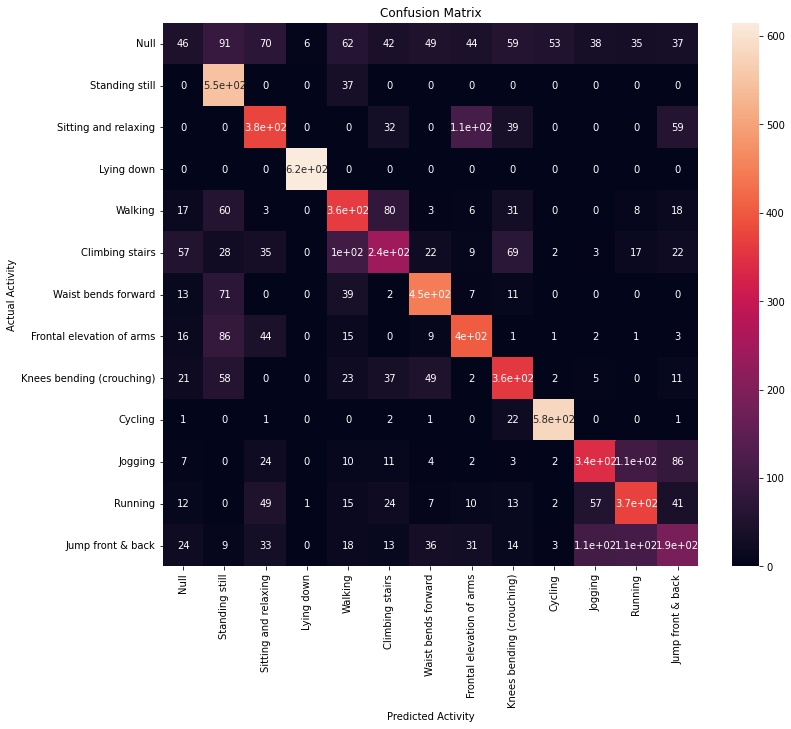

Accuracy Score: 62.7308%
Precision Score: 60.2114%
Recall Score: 62.9233%
F_1 Score: 60.8173%


In [ ]:
results_summarizer(y_test, y_pred_lr)

## Classical ML 2: K Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

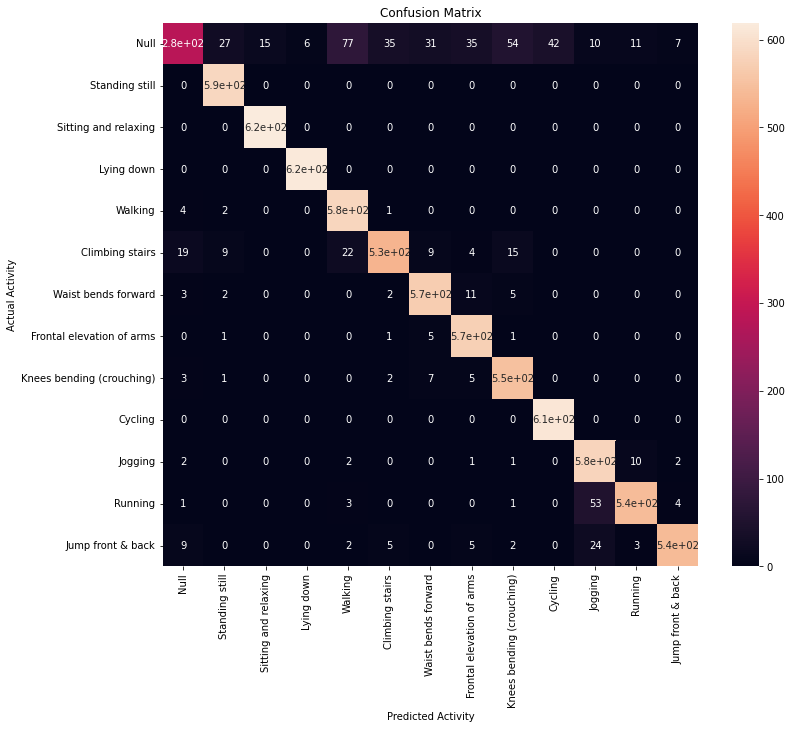

Accuracy Score: 92.1282%
Precision Score: 92.1069%
Recall Score: 92.3442%
F_1 Score: 91.5564%


In [ ]:
results_summarizer(y_test, y_pred_knn)

The results for K-nearest neighbor show an improved accuracy as it adapts better to the non-linear decision boundary

## Classical ML 3: Random Forest

In [ ]:
# applying random classifier with grid search for hyperparameter to improve accuracy score
n_estimators_select = [100, 150, 200] 
for n in n_estimators_select:
  rfc = RandomForestClassifier(random_state=0, n_estimators=n)
  score = cross_val_score(rfc, X_std, y_df, cv=5).mean()
  print(f'Number of estimators selected: {n}', f'Validation Accuracy: {score}')

Number of estimators selected: 100 Validation Accuracy: 0.9585128205128205
Number of estimators selected: 150 Validation Accuracy: 0.9593589743589742
Number of estimators selected: 200 Validation Accuracy: 0.9597692307692307


In [18]:
# Based on our hyperparameter exploration we saw that setting number of estimators to 200 yielded best accuracy
# Below I will train the model on this fact and fit it to the test set and generate corresponding results
rfc = RandomForestClassifier(random_state=0, n_estimators=200)
rfc.fit(X_train_scaled, y_train )
y_pred_rfc = rfc.predict(X_test_scaled)

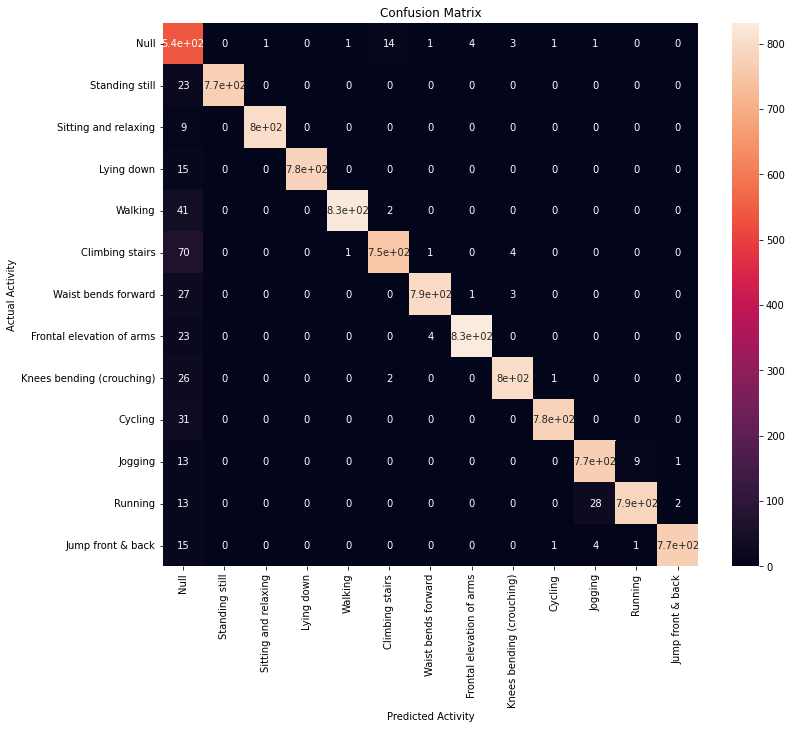

Accuracy Score: 96.1827%
Precision Score: 96.3450%
Recall Score: 96.1865%
F_1 Score: 95.9989%


In [19]:
results_summarizer(y_pred_rfc, y_test)

In [20]:
# feature importance plot
feature_scores = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_scores

acc_ch_z    0.081588
acc_rw_y    0.066179
acc_la_z    0.065308
acc_ch_x    0.064187
acc_rw_z    0.059641
gyr_rw_y    0.058142
acc_rw_x    0.055288
mag_la_x    0.054488
acc_la_y    0.054002
gyr_rw_x    0.050379
gyr_la_x    0.048843
gyr_la_z    0.048743
gyr_la_y    0.048187
gyr_rw_z    0.042236
mag_rw_z    0.034774
mag_rw_x    0.033748
acc_ch_y    0.026841
mag_la_y    0.024581
acc_la_x    0.023478
mag_la_z    0.021665
mag_rw_y    0.020699
4           0.008742
3           0.008261
dtype: float64

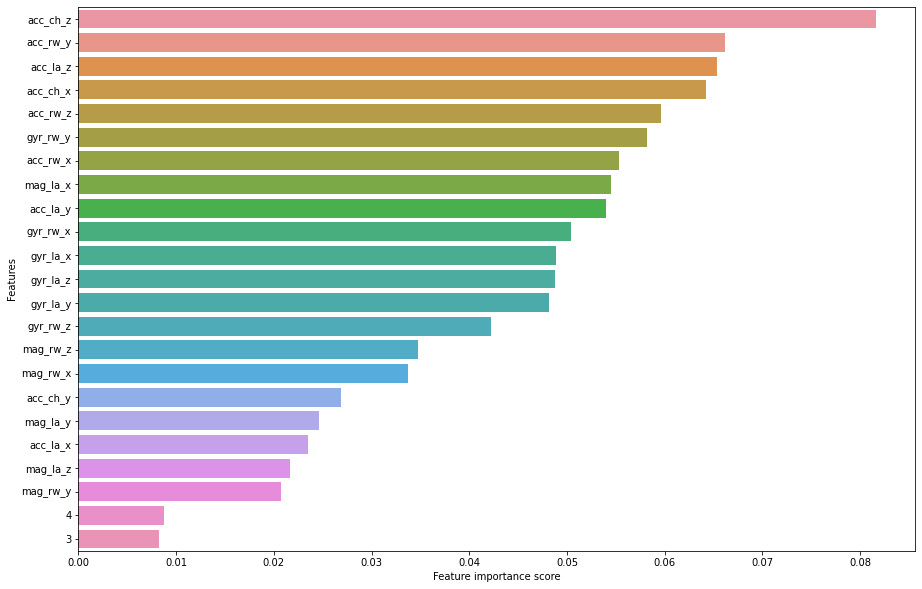

In [21]:
#visualize feature importance
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

The tree based model has performed much better than our other classical models this can be attributed to the fact that tree based models are conditional models which can take into account the underlying temporal relationship between each feature vector.

## 2.   Can deep learning enhanace the accuracy of classification task?

### The deeplearning model I have used is a convolutional nerual network

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_csv(f'/content/drive/My Drive/projects/MHEALTHDATASET/aggregate_mhealth.csv')

In [ ]:
df.head()

,acc_ch_x,acc_ch_y,acc_ch_z,3,4,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
978959,-9.9915,-1.94000,4.21490,0.334900,-0.159080,1.56440,-9.3953,-0.912450,-0.54360,-0.89869,...,4.6566,-4.34010,-0.16863,0.55236,-0.91810,-5.73170,1.3409,1.3160,0,subject8
332102,-9.8813,-0.88548,0.88873,0.020931,0.146520,0.98850,-9.6289,1.465900,-0.58998,-0.75047,...,1.4012,3.12210,-0.81765,0.60986,-0.06681,-0.87737,2.0300,2.4892,0,subject3
153015,-4.0326,-0.39105,-8.36150,0.142330,0.075353,3.16890,-9.0519,2.735300,-0.53061,-0.74109,...,-9.4894,-0.94322,-0.82353,-0.60986,-0.52586,-15.39700,-31.5940,37.5530,0,subject1
776193,-9.2635,-0.45922,-1.72550,-0.087912,-0.008373,0.21656,-3.0959,4.274500,-0.48980,-0.06379,...,-14.4480,2.15260,0.37647,-0.82341,-0.61207,36.16100,-64.3180,119.7800,0,subject7
641719,-9.6959,-0.05398,-0.25749,0.297230,0.209310,1.06640,-9.7630,-0.060818,-0.46753,-0.79174,...,-11.7390,0.11097,-0.49216,-0.78645,-0.61207,1.39910,-21.6730,-78.8170,0,subject5


In [ ]:
# Resample activity 0 (null class) to mitigate class imbalance 
df_activity_0 = df[df['activity'] == 0]
df_activity_else = df[df['activity'] != 0]

df_activity_0 = df_activity_0.sample(n=30720, random_state=1)
df = pd.concat([df_activity_0, df_activity_else])

In [ ]:
# Split data between predictors and output variable
X = df.drop(['activity', 'subject'], axis=1)
y = df['activity']

In [ ]:
# Standardize full set of predictors
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
# Standardize train/ test predictors based on training data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    activity_map = {
        0: 'Null',
        1: 'Standing still',  
        2: 'Sitting and relaxing', 
        3: 'Lying down',  
        4: 'Walking',  
        5: 'Climbing stairs',  
        6: 'Waist bends forward',
        7: 'Frontal elevation of arms', 
        8: 'Knees bending (crouching)', 
        9: 'Cycling', 
        10: 'Jogging', 
        11: 'Running', 
        12: 'Jump front & back' 
    }
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(cm,
                annot=True,
                cmap='viridis',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               ) 
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

In order to take the temporal nature of the data into account we will perform a sliding window based approach. This will help the convolutional neural network to identify underlying temporal relations. The following helper function will perform that task

In [ ]:
def split_timeseries(sequences,n_steps):
  X, y = list(), list()
  for i in range(len(sequences)):
    end_ix = i + n_steps
    if end_ix > len(sequences):
      break
    sequ_x, sequ_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
    X.append(sequ_x)
    y.append(sequ_y)
  return array(X), array(y)


In [ ]:
# Merging train and test X/y data to apply series transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train_scaled, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test_scaled, y_test_array]

In [ ]:
# Applying series transformation using time step of 25 for both train and test data
X_train_seq, y_train_seq = split_timeseries(train_set, 25)
print(X_train_seq.shape, y_train_seq.shape)

X_test_seq, y_test_seq = split_timeseries(test_set, 25)
print(X_test_seq.shape, y_test_seq.shape)

(41576, 25, 23) (41576,)
(10376, 25, 23) (10376,)


In [ ]:
# Converting output variables to categorical
y_train_seq = to_categorical(y_train_seq)
print(y_train_seq.shape)
print(y_train_seq)

y_test_seq = to_categorical(y_test_seq)
print(y_test_seq.shape)
print(y_test_seq)

(41576, 13)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(10376, 13)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Generating variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq.shape[1], X_train_seq.shape[2], y_train_seq.shape[1]
print(n_timesteps, n_features, n_outputs)

25 23 13


In [ ]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]
# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_timeseries(full_set, 25)
print(X_train_seq.shape, y_train_seq.shape)

(41576, 25, 23) (41576, 13)


In [ ]:
# Create train and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_seq, y_seq, test_size=0.25, random_state=1)
y_train_new = to_categorical(y_train_new)

## Convolution Model generation

In [ ]:
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features), padding='same'))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
  model.fit(X_train_new, y_train_new, epochs=10)

Epoch 1/10
8764/8764 [==============================] - 78s 9ms/step - loss: 0.0632 - accuracy: 0.9819
Epoch 2/10
8764/8764 [==============================] - 82s 9ms/step - loss: 0.0213 - accuracy: 0.9948
Epoch 3/10
8764/8764 [==============================] - 83s 9ms/step - loss: 0.0174 - accuracy: 0.9959
Epoch 4/10
8764/8764 [==============================] - 83s 9ms/step - loss: 0.0159 - accuracy: 0.9964
Epoch 5/10
8764/8764 [==============================] - 83s 9ms/step - loss: 0.0141 - accuracy: 0.9969
Epoch 6/10
8764/8764 [==============================] - 83s 10ms/step - loss: 0.0150 - accuracy: 0.9972
Epoch 7/10
8764/8764 [==============================] - 82s 9ms/step - loss: 0.0135 - accuracy: 0.9974
Epoch 8/10
8764/8764 [==============================] - 82s 9ms/step - loss: 0.0134 - accuracy: 0.9975
Epoch 9/10
8764/8764 [==============================] - 76s 9ms/step - loss: 0.0141 - accuracy: 0.9975
Epoch 10/10
8764/8764 [==============================] - 77s 9ms/step - 

In [ ]:
# Model architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 25, 64)            4480      
                                                                 
 conv1d_11 (Conv1D)          (None, 25, 64)            12352     
                                                                 
 dropout_5 (Dropout)         (None, 25, 64)            0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 12, 64)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 768)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               98432     
                                                      

In [ ]:
# predictions and results summary
y_pred = model.predict(X_test_new)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)

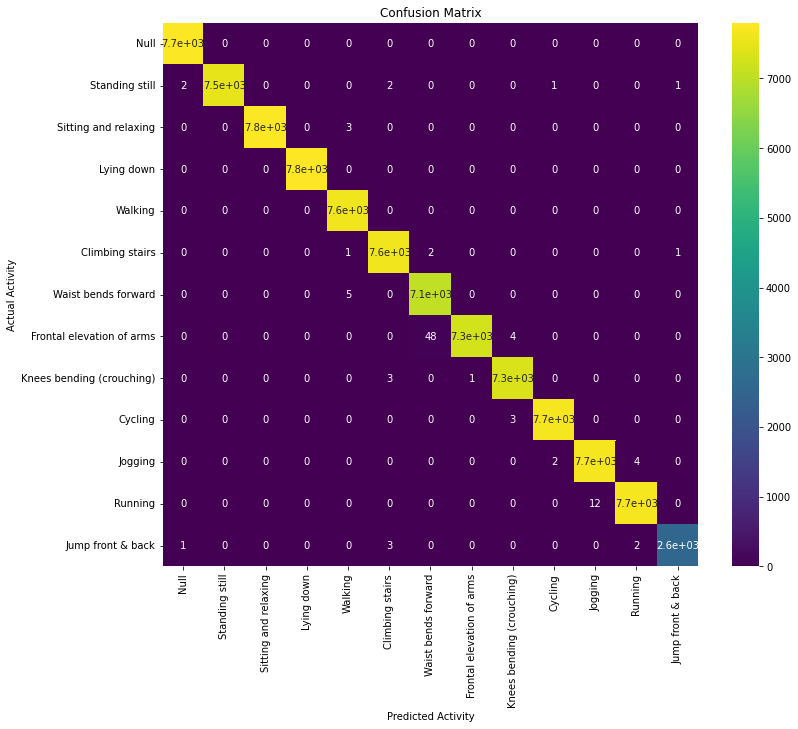

Accuracy Score: 99.8919%
Precision Score: 99.8905%
Recall Score: 99.8836%
F_1 Score: 99.8869%


In [ ]:
results_summarizer(y_test_new, y_pred)

This shows that the covolutional neural network has been able to capture and model the parameters to a strong level of generalizability. The model is performing very well with over evaluation metrics such as accuracy of 99.89% and F1_score of 99.88%.

The deep learning model is able to take advantage of the temporal sequence of data and form a strong model.

In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import ConvLSTM2D
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Conv1D
from keras.layers.convolutional import MaxPooling1D


## LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.fit(X_train_new, y_train_new, epochs=10)

Epoch 1/10
8764/8764 [==============================] - 191s 21ms/step - loss: 0.0843 - accuracy: 0.9764
Epoch 2/10
8764/8764 [==============================] - 189s 22ms/step - loss: 0.0206 - accuracy: 0.9949
Epoch 3/10
8764/8764 [==============================] - 188s 21ms/step - loss: 0.0120 - accuracy: 0.9972
Epoch 4/10
8764/8764 [==============================] - 184s 21ms/step - loss: 0.0089 - accuracy: 0.9979
Epoch 5/10
8764/8764 [==============================] - 184s 21ms/step - loss: 0.0080 - accuracy: 0.9982
Epoch 6/10
8764/8764 [==============================] - 186s 21ms/step - loss: 0.0059 - accuracy: 0.9987
Epoch 7/10
8764/8764 [==============================] - 185s 21ms/step - loss: 0.0060 - accuracy: 0.9987
Epoch 8/10
8764/8764 [==============================] - 185s 21ms/step - loss: 0.0052 - accuracy: 0.9989
Epoch 9/10
8764/8764 [==============================] - 184s 21ms/step - loss: 0.0049 - accuracy: 0.9989
Epoch 10/10
8764/8764 [==============================] 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               49600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 13)                1313      
                                                                 
Total params: 61,013
Trainable params: 61,013
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# predictions and results summary
y_pred = model.predict(X_test_new)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)

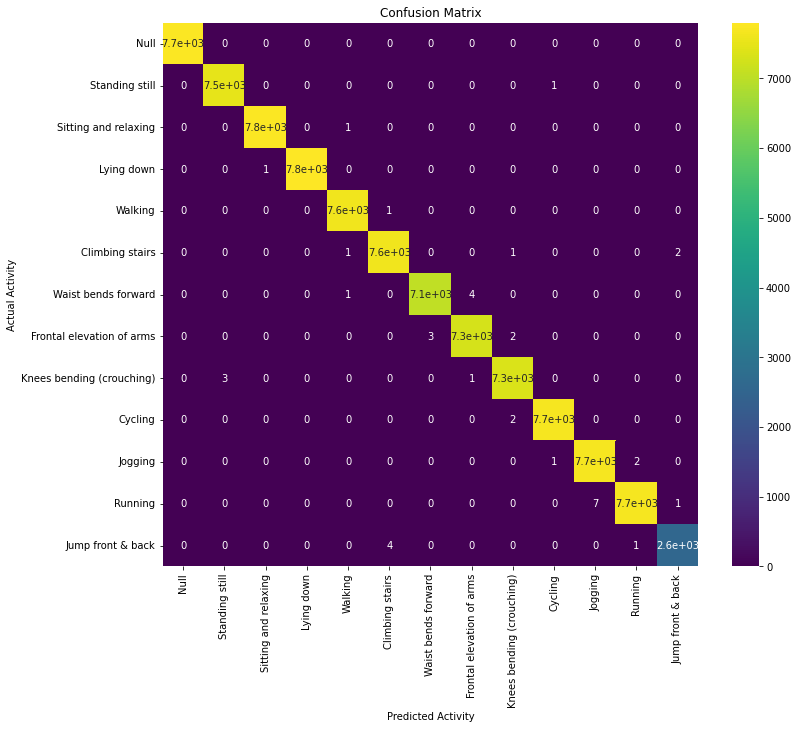

Accuracy Score: 99.9572%
Precision Score: 99.9532%
Recall Score: 99.9491%
F_1 Score: 99.9511%


In [ ]:
results_summarizer(y_test_new, y_pred)

In [ ]:
X_train_new.shape

(280418, 25, 23)

## CONV-LSTM Model

In [ ]:
n_steps, n_length = 1, 25
X_train_shpd = X_train_new.reshape((X_train_new.shape[0], n_steps, 1, n_length, n_features))
#X_test_shpd = X_test_new.reshape((X_test_new.shape[0], n_steps, 1, n_length, n_features))


model = Sequential()
model.add(ConvLSTM2D(64,(1,3), activation='relu',input_shape=(n_steps, 1, n_length, n_features)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.fit(X_train_shpd, y_train_new, epochs=10)

Epoch 1/10
8764/8764 [==============================] - 182s 20ms/step - loss: 0.0715 - accuracy: 0.9796
Epoch 2/10
8764/8764 [==============================] - 177s 20ms/step - loss: 0.0195 - accuracy: 0.9950
Epoch 3/10
8764/8764 [==============================] - 184s 21ms/step - loss: 0.0140 - accuracy: 0.9966
Epoch 4/10
8764/8764 [==============================] - 175s 20ms/step - loss: 0.0120 - accuracy: 0.9971
Epoch 5/10
8764/8764 [==============================] - 198s 23ms/step - loss: 0.0115 - accuracy: 0.9974
Epoch 6/10
8764/8764 [==============================] - 180s 21ms/step - loss: 0.0103 - accuracy: 0.9977
Epoch 7/10
8764/8764 [==============================] - 176s 20ms/step - loss: 0.0099 - accuracy: 0.9978
Epoch 8/10
8764/8764 [==============================] - 175s 20ms/step - loss: 0.0094 - accuracy: 0.9979
Epoch 9/10
8764/8764 [==============================] - 180s 20ms/step - loss: 0.0086 - accuracy: 0.9982
Epoch 10/10
8764/8764 [==============================] 

In [ ]:
# predictions and results summary
X_test_shpd = X_test_new.reshape((X_test_new.shape[0], n_steps, 1, n_length, n_features))
y_pred = model.predict(X_test_shpd)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)

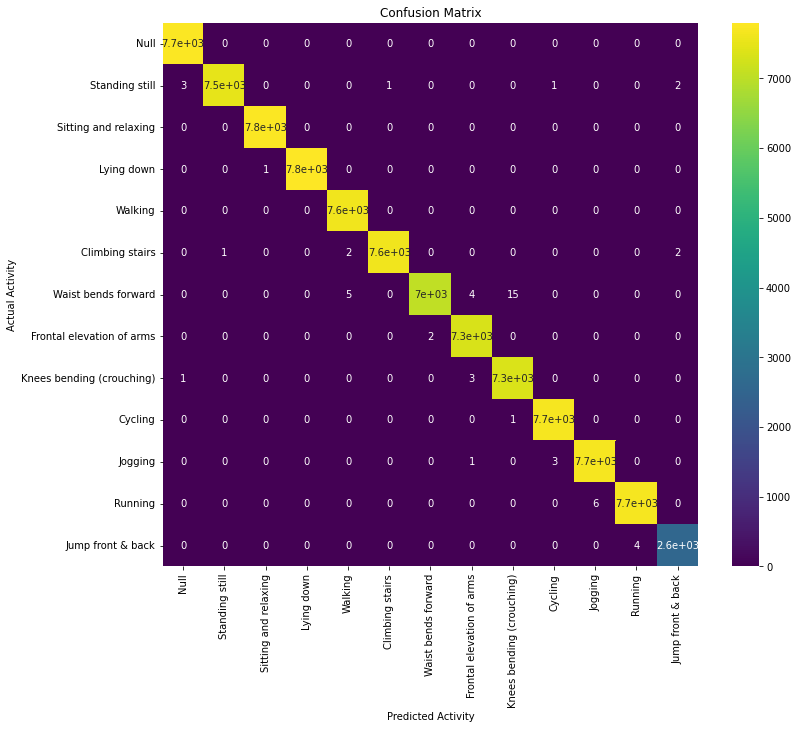

Accuracy Score: 99.9379%
Precision Score: 99.9327%
Recall Score: 99.9315%
F_1 Score: 99.9320%


In [ ]:
results_summarizer(y_test_new, y_pred)

# Future research direction time series classification based on Gramian Fields

In [ ]:
!pip install pyts

     |████████████████████████████████| 2.5 MB 5.0 MB/s 


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
#from pyts.datasets import load_gunpoint
%matplotlib inline

In [ ]:
df_gaf = pd.read_csv(f'/content/drive/My Drive/projects/MHEALTHDATASET/mHealth_subject10.log',
                        header =None, sep='\t')

In [ ]:
df_gaf.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-9.6997,-0.87525,-0.96298,-0.029304,-0.079540,0.28409,-9.5692,1.4931,0.70501,-0.48968,...,-0.98630,-8.7188,4.1161,0.64510,-0.45175,0.69181,0.71991,0.17803,0.37363,0
1,-9.4890,-0.80103,-1.10370,-0.062794,-0.092098,0.41798,-9.6980,1.4880,0.70501,-0.48968,...,-0.98795,-9.0372,4.2773,0.66667,-0.44353,0.66810,0.54040,0.17978,0.37002,0
2,-9.5541,-1.08310,-1.24480,-0.075353,-0.117220,0.33479,-9.5896,1.4405,0.69388,-0.48593,...,-0.89327,-8.7099,4.0124,0.66667,-0.44353,0.66810,0.72539,0.72599,0.72927,0
3,-9.3680,-0.79141,-0.93438,-0.092098,-0.129770,0.27516,-9.6480,1.5412,0.69388,-0.48593,...,-0.95632,-8.7986,4.1434,0.66667,-0.44353,0.66810,0.54392,0.53186,-0.71646,0
4,-9.6678,-0.95335,-1.20160,-0.092098,-0.129770,0.32434,-9.6298,1.3759,0.69388,-0.48593,...,-0.95808,-8.5089,4.1058,0.66863,-0.45175,0.69181,0.54210,0.35041,-0.71468,0


In [ ]:
df_gaf = df_gaf.loc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]].rename(columns={
      0: 'acc_ch_x', 
      1: 'acc_ch_y', 
      2: 'acc_ch_z', 
      5: 'acc_la_x', 
      6: 'acc_la_y', 
      7: 'acc_la_z', 
      8: 'gyr_la_x',
      9: 'gyr_la_y', 
      10: 'gyr_la_z', 
      11: 'mag_la_x', 
      12: 'mag_la_y', 
      13: 'mag_la_z', 
      14: 'acc_rw_x', 
      15: 'acc_rw_y',
      16: 'acc_rw_z', 
      17: 'gyr_rw_x', 
      18: 'gyr_rw_y', 
      19: 'gyr_rw_z', 
      20: 'mag_rw_x', 
      21: 'mag_rw_y', 
      22: 'mag_rw_z',
      23: 'activity'
  })

In [ ]:
df_gaf.head()

,acc_ch_x,acc_ch_y,acc_ch_z,3,4,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,...,acc_rw_x,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity
0,-9.6997,-0.87525,-0.96298,-0.029304,-0.079540,0.28409,-9.5692,1.4931,0.70501,-0.48968,...,-0.98630,-8.7188,4.1161,0.64510,-0.45175,0.69181,0.71991,0.17803,0.37363,0
1,-9.4890,-0.80103,-1.10370,-0.062794,-0.092098,0.41798,-9.6980,1.4880,0.70501,-0.48968,...,-0.98795,-9.0372,4.2773,0.66667,-0.44353,0.66810,0.54040,0.17978,0.37002,0
2,-9.5541,-1.08310,-1.24480,-0.075353,-0.117220,0.33479,-9.5896,1.4405,0.69388,-0.48593,...,-0.89327,-8.7099,4.0124,0.66667,-0.44353,0.66810,0.72539,0.72599,0.72927,0
3,-9.3680,-0.79141,-0.93438,-0.092098,-0.129770,0.27516,-9.6480,1.5412,0.69388,-0.48593,...,-0.95632,-8.7986,4.1434,0.66667,-0.44353,0.66810,0.54392,0.53186,-0.71646,0
4,-9.6678,-0.95335,-1.20160,-0.092098,-0.129770,0.32434,-9.6298,1.3759,0.69388,-0.48593,...,-0.95808,-8.5089,4.1058,0.66863,-0.45175,0.69181,0.54210,0.35041,-0.71468,0


In [ ]:
# creating univariate dataset with only acc_ch_x and activity label
df_gaf_uni = df_gaf[['acc_ch_x','activity']]
df_gaf_uni.head()

,acc_ch_x,activity
0,-9.6997,0
1,-9.4890,0
2,-9.5541,0
3,-9.3680,0
4,-9.6678,0


In [ ]:
df_gaf_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98304 entries, 0 to 98303
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   acc_ch_x  98304 non-null  float64
 1   activity  98304 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [ ]:
df_gaf_uni.describe()

,acc_ch_x,activity
count,98304.000000,98304.000000
mean,-8.417457,2.111481
std,4.093564,3.513251
min,-22.139000,0.000000
25%,-9.757700,0.000000
50%,-9.174700,0.000000
75%,-6.629100,3.000000
max,17.618000,12.000000


In [ ]:
df_gaf_uni['activity'].value_counts()

0     64614
5      3072
1      3072
2      3072
3      3072
4      3072
9      3072
10     3072
11     3072
8      2867
7      2765
6      2458
12     1024
Name: activity, dtype: int64

In [ ]:
#resample the null class
df_gaf_activity_0 = df_gaf_uni[df_gaf_uni['activity']==0]
df_gaf_activity_else = df_gaf_uni[df_gaf_uni['activity']!=0]

df_gaf_activity_0 = df_gaf_activity_0.sample(n=3072, random_state=1)
df_gaf_blnsd = pd.concat([df_gaf_activity_0, df_gaf_activity_else])

print(df_gaf_blnsd['activity'].value_counts())


0     3072
5     3072
1     3072
2     3072
3     3072
4     3072
9     3072
10    3072
11    3072
8     2867
7     2765
6     2458
12    1024
Name: activity, dtype: int64


In [ ]:
print(df_gaf_blnsd.shape)


(36762, 2)


In [ ]:
#Split data between predictors and output variable
X = df_gaf_blnsd.drop(['activity'], axis=1)
y = df_gaf_blnsd['activity']

In [ ]:
print(X.shape)
print(y.shape)

(36762, 1)
(36762,)


In [ ]:
# Standardize full set of predictors
X_gaf_scaled = StandardScaler().fit_transform(X)


In [ ]:
# Train test split
X_train_gaf, X_test_gaf, y_train_gaf, y_test_gaf = train_test_split(X,y, test_size=0.20, random_state = 0)

In [ ]:
print(X_train_gaf.shape)
print(y_train_gaf.shape)

(29409, 1)
(29409, 13)


In [ ]:
print(X_test_gaf.shape)
print(y_test_gaf.shape)

(7353, 1)
(7353, 13)


In [ ]:
# Standardize train/ test predictors based on training data
scaler = StandardScaler().fit(X_train_gaf)
X_train_gaf_scaled = scaler.transform(X_train_gaf)
X_test_gaf_scaled = scaler.transform(X_test_gaf)

In [ ]:
print(X_train_gaf_scaled.shape)
print(X_test_gaf_scaled.shape)

(29409, 1)
(7353, 1)


In [ ]:
# Creating the training images
gasf = GramianAngularField(method='summation')
X_gasf_train = gasf.fit_transform(X_train_gaf_scaled)

In [ ]:
X_gasf_train.shape

(29409, 1, 1)

In [ ]:
X_gasf_train.shape[0]

29409

In [ ]:
y_train_gaf = to_categorical(y_train_gaf)
print(y_train_gaf.shape)
print(type(y_train_gaf))

(29409, 13, 2)
<class 'numpy.ndarray'>


In [ ]:
y_train_gaf[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Creating test images
gasf = GramianAngularField(method='summation')
X_gasf_test = gasf.fit_transform(X_test_gaf_scaled)
print(f'test data shape:{X_gasf_test.shape}')

test data shape:(10400, 23, 23)


In [ ]:
y_test_gaf.shape

(7353,)

In [ ]:
y_test_gaf = to_categorical(y_test_gaf)
print(y_test_gaf.shape)
print(type(y_test_gaf))

(7353, 13)
<class 'numpy.ndarray'>


In [ ]:
# saving the images
from PIL import Image 

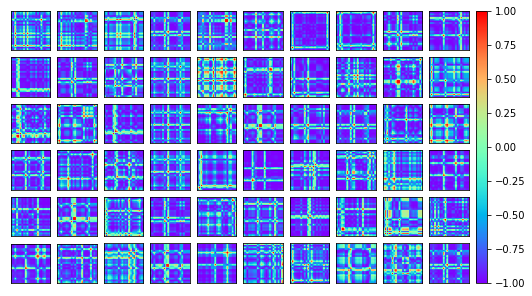

In [ ]:
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(6, 10), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    #plotting the images creted from gramian field
    im = ax.imshow(X_gasf_train[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
    
    
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

In [ ]:
#saving the dataset of training images in folder
for i in range(X_gasf_train.shape[0]):
  #saving the images to drive
  plt.imsave(f'/content/drive/My Drive/projects/MHEALTHDATASET/gaf_images_train/gaf{i}.png',X_gasf_train[i], cmap='rainbow', origin='lower')


## References:



1.   http://mdpi.com/2227-9709/5/2/27
2.   https://link.springer.com/chapter/10.1007/978-3-642-21257-4_36
3.   https://ieeexplore.ieee.org/abstract/document/7026300/
4.   https://developersbay.se/time-series-classification-an-overview/
5.   https://machinelearningmastery.com/how-to-load-and-explore-a-standard-human-activity-recognition-problem/
6.   https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/
7. https://www.youtube.com/watch?v=L2B5gp-VxxQ&ab_channel=ColeBryant

